<a href="https://colab.research.google.com/github/shrad1997/multiple_linear_regression/blob/main/50_startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("/content/50_Startups.csv")

In [3]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
df.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},axis=1,inplace=True)

In [6]:
df.head(5)

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
#label encoding for state column
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
df['State']=LE.fit_transform(df['State'])
df['State'].unique()

array([2, 0, 1])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [10]:
df.duplicated().value_counts()

False    50
dtype: int64

In [11]:
df.corr()

,RD_Spend,Administration,Marketing_Spend,State,Profit
RD_Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


#Scatterplot between variables along with histograms

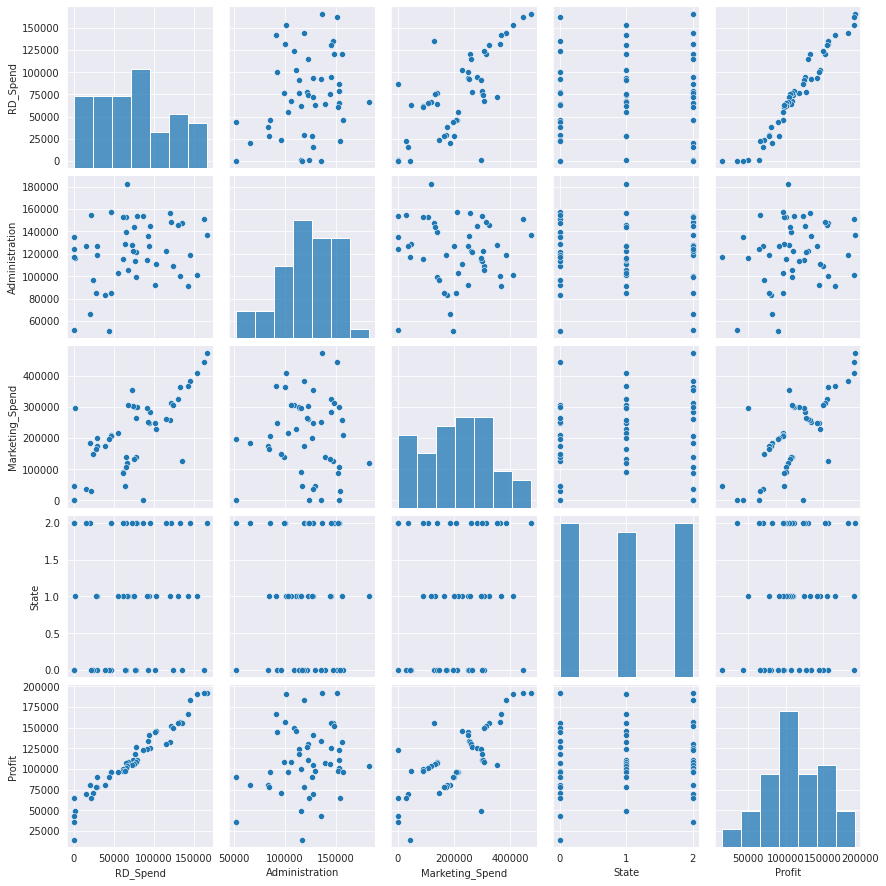

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(df) #from this plot we can say that there is no multicolinearity problem on this dataset

#preparing a model

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [15]:
import statsmodels.formula.api as smf
model= smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df).fit()

In [16]:
model.params

Intercept          50142.506443
RD_Spend               0.805760
Administration        -0.026826
Marketing_Spend        0.027228
State                -22.320577
dtype: float64

In [17]:
print(model.tvalues,'\n P values\n',model.pvalues)

Intercept           7.368962
RD_Spend           17.608621
Administration     -0.519906
Marketing_Spend     1.636966
State              -0.013865
dtype: float64 
 P values
 Intercept          2.900008e-09
RD_Spend           8.249206e-22
Administration     6.056771e-01
Marketing_Spend    1.086131e-01
State              9.889988e-01
dtype: float64


In [18]:
(model.rsquared,model.rsquared_adj) 

(0.9507462044842656, 0.9463680893273114)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           8.51e-29
Time:                        08:43:37   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD_Spend            0.8058      0.046     17.609      0.000       0.714       0.898
Administration     -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing_Spend     0.0272      0.017      1.637      0.109      -0.006       0.061
State             -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#calculating VIF

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [24]:
df.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [25]:
rsq_RD_Spend = smf.ols('RD_Spend~Administration+Marketing_Spend+State',data=df).fit().rsquared  
vif_RD_Spend = 1/(1-rsq_RD_Spend) 

rsq_Administration = smf.ols('Administration~RD_Spend+Marketing_Spend+State',data=df).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_Marketing_Spend = smf.ols('Marketing_Spend~Administration+RD_Spend+State',data=df).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 

rsq_State = smf.ols('State~Administration+Marketing_Spend+RD_Spend',data=df).fit().rsquared  
vif_State = 1/(1-rsq_State) 

# Storing vif values in a data frame
d1 = {'Variables':['RD_Spend', 'Administration', 'Marketing_Spend', 'State'],'VIF':[vif_RD_Spend,vif_Administration,vif_Marketing_Spend,vif_State]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD_Spend,2.481178
1,Administration,1.175315
2,Marketing_Spend,2.326780
3,State,1.011281


For all variables VIF value is <20 ..hence  there is no multicollinearity problem

#Residual Analysis

#Test for Normality of Residuals (Q-Q Plot)

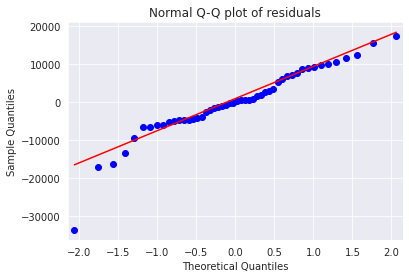

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [28]:
list(np.where(model.resid>10000))

[array([10, 12, 16, 36, 38, 45])]

#Residual Plot for Homoscedasticity

In [29]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

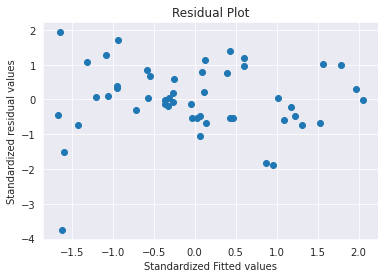

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#Residual Vs Regressors

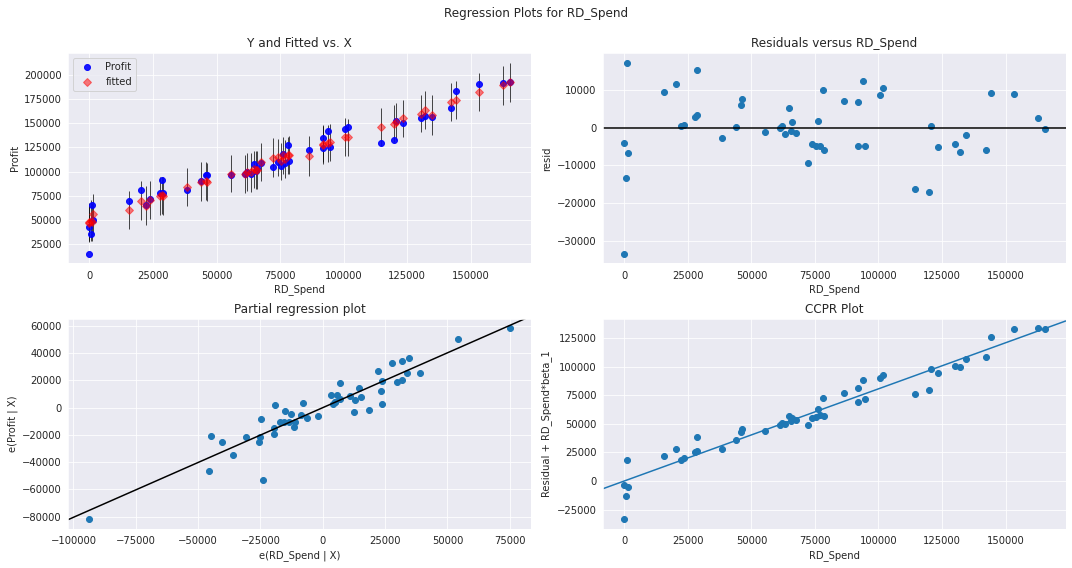

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

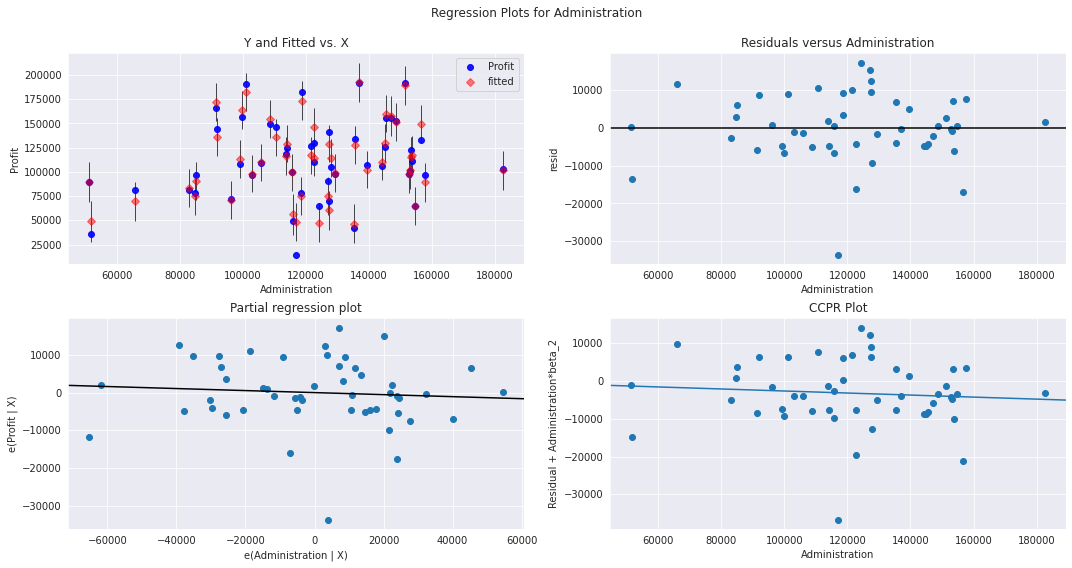

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

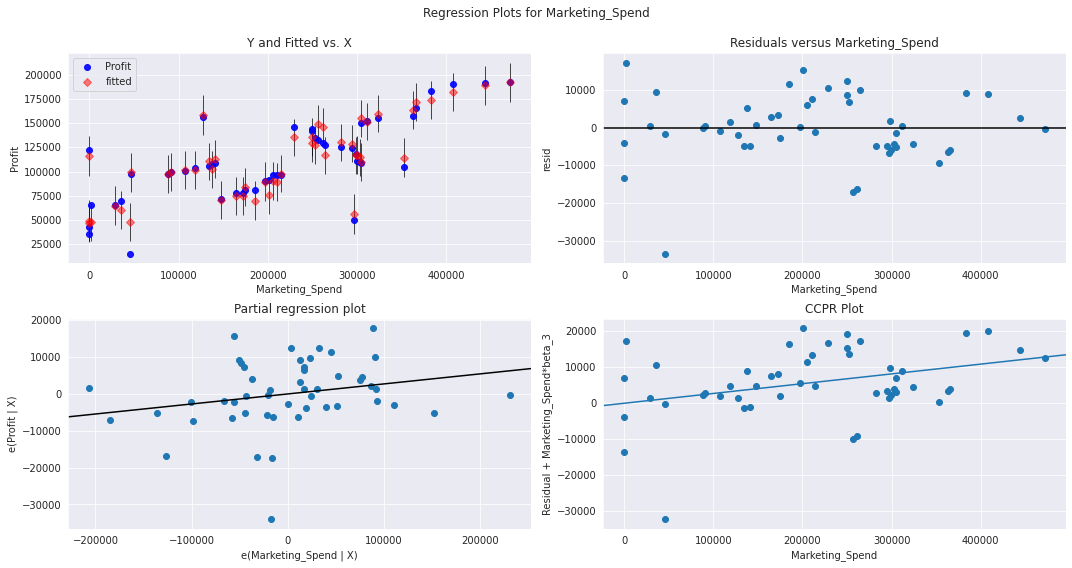

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

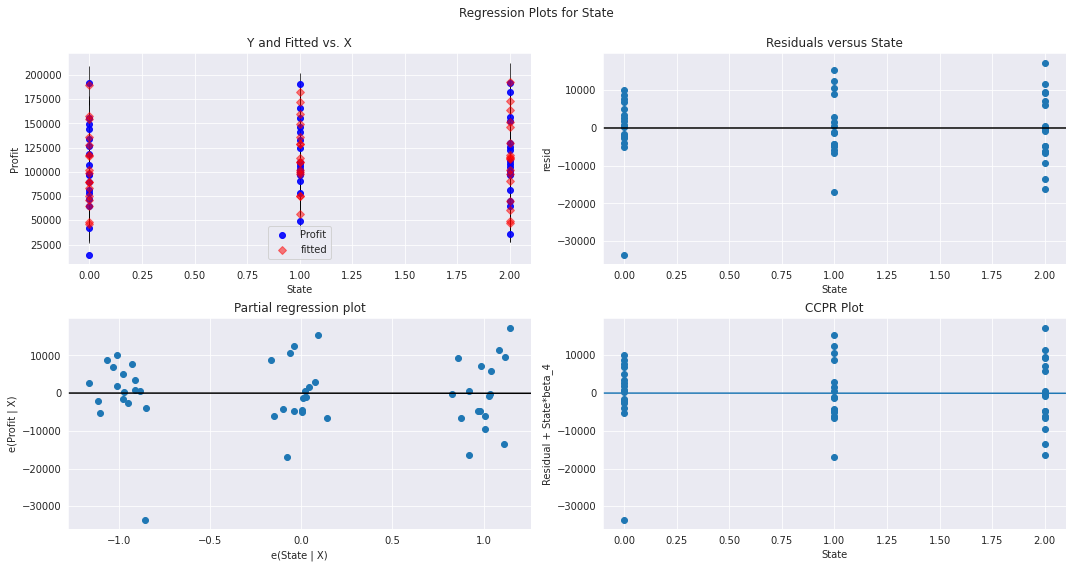

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State", fig=fig)
plt.show()

#Model Deletion Diagnostics

#Detecting Influencers/Outliers

#Cook's Distance

In [35]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


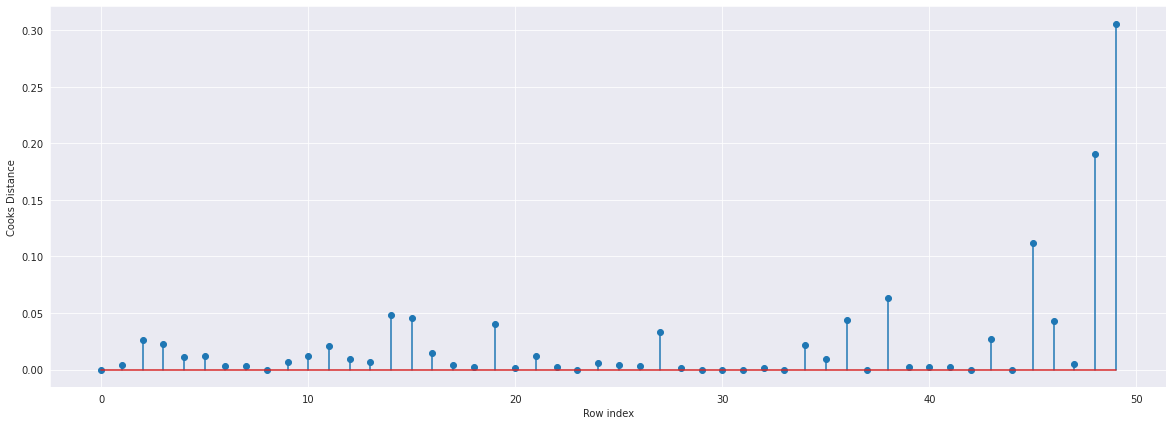

In [36]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
(np.argmax(c),np.max(c))

(49, 0.30602819546993326)

#High Influence Point

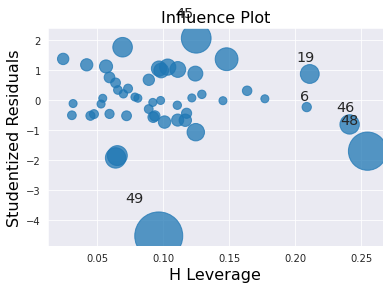

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [41]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [42]:
leverage_cutoff

0.36

leverage cutoff is 0.36 hence no point will get deleted

#Build Model

In [43]:
import statsmodels.formula.api as smf
model2= smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df).fit()

In [44]:
(model2.rsquared,model2.aic)

(0.9507462044842656, 1060.7712849964787)

#Predicting for new data point

In [45]:
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [50]:
#New data for prediction
new_data=pd.DataFrame({"RD_Spend":144372.41,"Administration":161377.59,"Marketing_Spend":368168.42,"State":2},index=[1])

In [51]:
new_data


,RD_Spend,Administration,Marketing_Spend,State
1,144372.41,161377.59,368168.42,2


In [52]:
model2.predict(new_data)

1    172122.608224
dtype: float64